In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from skimage import exposure
from sklearn.metrics import classification_report

digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


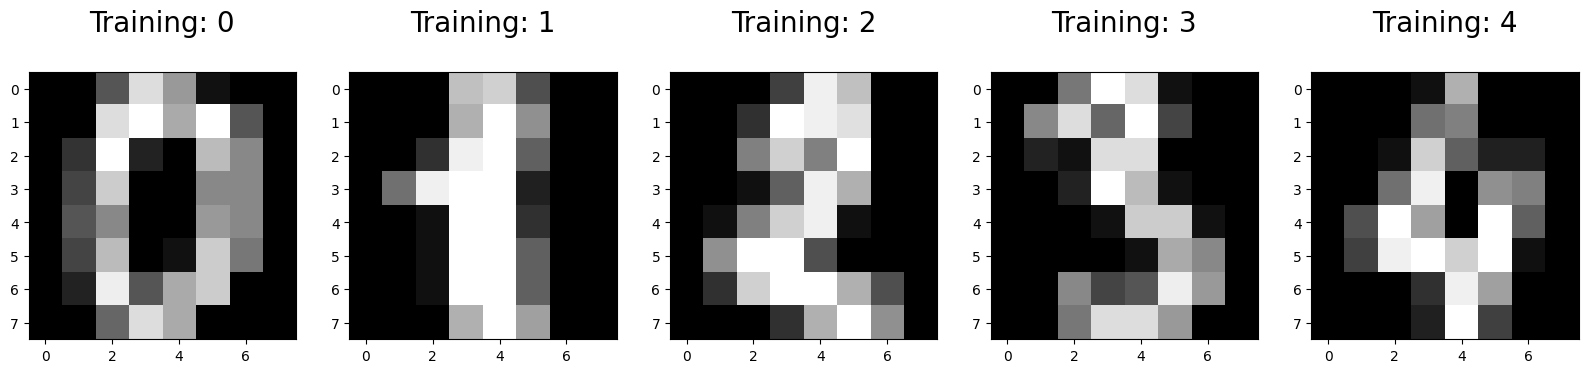

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
X = digits.data
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


In [5]:
#Reshape  the images to 2D arrays
X = X.reshape(-1, 8, 8)
X

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
# Preprocess the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

X_preprocessed # sets the numbers between 0 and 1

[array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
        0.06666667, 0.        , 0.        , 0.        , 0.        ,
        0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
        0.        , 0.        , 0.2       , 1.        , 0.13333333,
        0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
        0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
        0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
        0.        , 0.        , 0.6       , 0.53333333, 0.        ,
        0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
        0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
        0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
        0.        , 0.        , 0.        , 0.4       , 0.86666667,
        0.66666667, 0.        , 0.        , 0.        ]),
 array([0.    , 0.    , 0.    , 0.75  , 0.8125, 0.3125, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.6875, 1.    , 0.5625

In [7]:
X_preprocessed = np.array(X_preprocessed) # convert to 2d array
X_preprocessed[0]

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

#PURPOSE OF TRAINING AND TESETING SETS
# We split the data into 'train' and 'test' sets
# We use the training set to train the ML model so that it can learn and predict what the correct outcome should be
# We then apply this to our test set and evaluate its performance as this is un-seen data which we know the values of
# We can also decide whether or not the model is overfitting and/or if it needs hypertuning 
# # Following the lecture, the steps are as follows


RandomForestClassifier(random_state=42)

In [9]:
# predict
y_pred = rf_classifier.predict(X_test)


# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Show metrics
print('Random Forest Classifier:')
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))

print("Confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("Accuracy score: ", accuracy_score(y_pred, y_test))
# 1. Load the data
# 2. Assign X and y
# 3. Apply contrast stretching based on a low and high percentile (pre processing)
# We extra the bottom 2% and also the top 2% (or 98%)
# What this means is that the bottom 2%, if it can get darker, then do it.
# If the top 2% an get brighter then increase it
# 4. Flatten the rescaled image back to a 1D object so that it can be used by the algorithm
# 5. Split the collection into Train and Test. This is so that the model can learn from the training set, and we can test it using the testing set to see if its learnt something

Random Forest Classifier:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion matrix: 
 [[52  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  0]
 [ 0  1 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  2]
 [ 1  0  0  0 60  1  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  2]
 [ 0  0  0  2  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  1  0 55]]
Accuracy score:  0.9722222222222222


In [10]:
# PICKING A PARAMETER TO TUNE
# Perform hyperparameter tuning using GridSearchCV
# We will see if changing the ***n_estimators***, ***Max_depth*** or ***min_sample split*** will affect the accuracy of the data.
# This is because the results before may have circum to overfitting.
# A common cause of overfitting is the number of trees hence why max_depth and n_estimators have been picked
# Hypertuning will allow us to reduce the complexity of the tree and ensure a better line of best fit

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    
}
grid_search = GridSearchCV(rf_classifier, param_grid)
grid_search.fit(X_train, y_train)



GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [11]:
# Results : RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

best_rf_classifier = grid_search.best_estimator_
best_rf_classifier


RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [12]:
# Fitting my model with the new parameter, n_estimators=300

model_random = RandomForestClassifier(#max_depth=20, 
                                      n_estimators=300, 
                                      random_state=42) 
model_random.fit(X_train, y_train) 
y_pred_best = model_random.predict(X_test) 
print(classification_report(y_pred_best, y_test)) 

# Evaluate the performance of the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

# Show metrics
print('Random Forest Classifier:')
print('Accuracy: {:.2f}'.format(accuracy_best))
print('Precision: {:.2f}'.format(precision_best))
print('Recall: {:.2f}'.format(recall_best))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.98      0.96      0.97        51
           2       1.00      0.98      0.99        48
           3       0.94      1.00      0.97        51
           4       1.00      0.97      0.98        62
           5       0.95      0.97      0.96        65
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.93      0.94        44
           9       0.97      0.97      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

Random Forest Classifier:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97


In [13]:
# If i were to use all the values from hyper tuning i would run the below
# 
# # #Get results again...

# # Train the classifier with the best parameters
# best_rf_classifier = grid_search.best_estimator_
# best_rf_classifier.fit(X_train, y_train)

# # Make predictions using the best classifier
# y_pred_best = best_rf_classifier.predict(X_test)

# # Evaluate the performance of the best classifier
# accuracy_best = accuracy_score(y_test, y_pred_best)
# precision_best = precision_score(y_test, y_pred_best, average='macro')
# recall_best = recall_score(y_test, y_pred_best, average='macro')
# f1_best = f1_score(y_test, y_pred_best, average='macro')

# # Show metrics
# print('Random Forest Classifier:')
# print('Accuracy: {:.2f}'.format(accuracy_best))
# print('Precision: {:.2f}'.format(precision_best))
# print('Recall: {:.2f}'.format(recall_best))
# print('F1 Score: {:.2f}'.format(f1_best))



In [14]:
print("BEFORE")
print("Confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("Accuracy score: ", accuracy_score(y_pred, y_test))

print()
print("AFTER")
print("Confusion matrix: \n", confusion_matrix(y_pred_best, y_test))
print("Accuracy score: ", accuracy_score(y_pred_best, y_test))


BEFORE
Confusion matrix: 
 [[52  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  0]
 [ 0  1 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  2]
 [ 1  0  0  0 60  1  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  2]
 [ 0  0  0  2  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  1  0 55]]
Accuracy score:  0.9722222222222222

AFTER
Confusion matrix: 
 [[52  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  0]
 [ 0  1 47  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  0]
 [ 1  0  0  0 60  1  0  0  0  0]
 [ 0  0  0  1  0 63  1  0  0  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  2  0  0  0  0 41  1]
 [ 0  0  0  0  0  1  0  1  0 57]]
Accuracy score:  0.9740740740740741


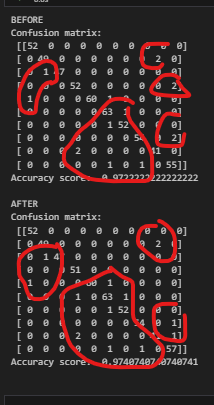


From the image we can see where the model improved and where there remains difficulty for the model to predict

The bulk of the errors are in the center which makes sense as there is a shift in colour in these areas mainly throughout the data